## DESARROLLAR UNA GRAFICA DE DISPERSION CON DATOS QUE EL ALUMNO CONSIDERE PARA DETEERMINAR UNA GRAFICA DE DISPERSION, QUE CONTENGA LOS SIGUIENTES REQUERIMIENTOS. UTILICE FUENTE CSV DE USO LIBRE.

a. GRAFICA DE DISPERSION CON REGRESION LINEAL SIMPLE

b. DETERMINAR EL COEFICIENTE DE CORRELACION

c. DETERMINAR EL COEFICIENTE DE DETERMINACION

d. DETERMINAR LA ECUACION DE LA RECTA

e. GENERAR UNA PREDICCION

f. DESCRIBA UNA BREVE INTERPRETACION DE LO QUE MUESTRAN SUS DATOS.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")



viviendas.csv

Tamaño_Pies_Cuadrados,Número_Habitaciones,Precio_Venta

800,2,150000
900,1,160000
950,2,180000
1000,2,170000
1200,3,250000
1400,3,300000
1600,4,380000
1800,4,400000
2000,5,600000
2200,5,700000
2400,6,850000
2600,6,1000000

In [60]:
data = pd.read_csv('../2 Extras/paraTarea3/viviendas.csv')

X = data[['Tamaño_Pies_Cuadrados']]
Y = data['Precio_Venta']

In [61]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

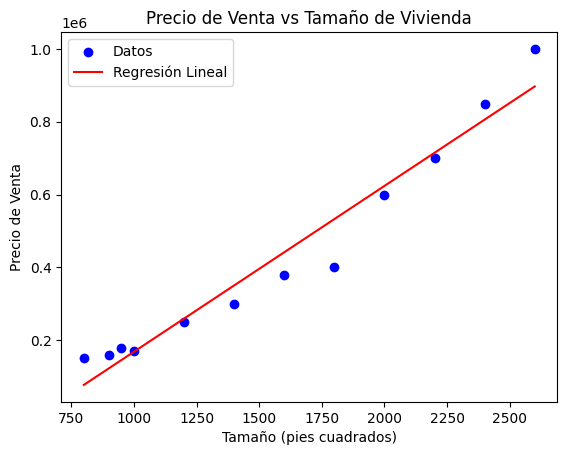

In [62]:
plt.scatter(data['Tamaño_Pies_Cuadrados'], Y, color='blue', label='Datos')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio de Venta')
plt.title('Precio de Venta vs Tamaño de Vivienda')
plt.plot(data['Tamaño_Pies_Cuadrados'], model.predict(X), color='red', label='Regresión Lineal')
plt.legend()
plt.show()

In [63]:
print("solamente entre Tamaño_Pies_Cuadrados y Precio_Venta")


#coeficiente de correlación
print("\nCoeficiente de correlacion: ",round(np.corrcoef(data['Tamaño_Pies_Cuadrados'],data['Precio_Venta'])[0,1],4))


#coeficiente de determinación
print("\nCoeficiente de determinación: ",round(model.score(X,Y),4))
print("Coeficiente de determinacion: ",round(r2_score(data['Precio_Venta'],model.predict(data[['Tamaño_Pies_Cuadrados']])),4))


#ecuacion de la recta
print("\nEcuacion de la Recta: ",round(model.coef_[0],4), "x + ",round(model.intercept_,4))


print("\nEntre Todo")
data.corr()

solamente entre Tamaño_Pies_Cuadrados y Precio_Venta

Coeficiente de correlacion:  0.9756

Coeficiente de determinación:  0.9517
Coeficiente de determinacion:  0.9517

Ecuacion de la Recta:  455.3194 x +  -286897.4868

Entre Todo


,Tamaño_Pies_Cuadrados,Número_Habitaciones,Precio_Venta
Tamaño_Pies_Cuadrados,1.000000,0.975814,0.975568
Número_Habitaciones,0.975814,1.000000,0.949637
Precio_Venta,0.975568,0.949637,1.000000


In [64]:
dato_predecir = 3000
prediccion= model.predict([[dato_predecir]])
print("La prediccion del precio de ",dato_predecir,"Tamaño_Pies_Cuadrados es de",round(prediccion[0],2))


La prediccion del precio de  3000 Tamaño_Pies_Cuadrados es de 1079060.58


Lo que se muestran primero revisamos es que tento depende el precio por el tamaño de pies cuadrados en la casa, como podemos ver es hacia arriba y hacia la derecha la recta eso quiere decir que entre mas pies cuadrados sea la casa mayor sera su precio, si vemos en la anterir tabla que muetr al correlacion entre todo podemos ver que la relaccion entre precio y tamaño es mayor que entre el precio y numero de habitacion, esa tabla tambien sierve para ver que tanta relacion tiene que con que 


# BOOTSTRAPPING PARA INTERVALOS DE CONFIANZA

Bootstrapping es una técnica estadística utilizada para estimar la distribución de una muestra. Se utiliza comúnmente para calcular intervalos de confianza sin hacer suposiciones sobre la distribución de los datos.


La principal utilidad del bootstrapping es la estimación de intervalos de confianza cuando los métodos tradicionales, como el teorema central del límite, no son aplicables o se desea evitar suposiciones sobre la distribución de los datos.

In [65]:
data = pd.read_csv('../2 Extras/paraTarea3/viviendas.csv')

def bootstrap(data, num_bootstrap_samples=1000):
    bootstrap_samples = []
    
    # Generar muestras con reemplazo
    for _ in range(num_bootstrap_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_samples.append(np.mean(sample))
    
    return bootstrap_samples, np.percentile(bootstrap_samples, [2.5, 97.5])

def plot_bootstrap(bootstrap_samples):
    plt.hist(bootstrap_samples, bins=50, alpha=0.7)
    plt.title('Distribución de las medias (Bootstrapping)')
    plt.xlabel('Media del Precio de Venta')
    plt.ylabel('Frecuencia')
    plt.axvline(np.percentile(bootstrap_samples, 2.5), color='r', linestyle='--', label='2.5 percentil')
    plt.axvline(np.percentile(bootstrap_samples, 97.5), color='g', linestyle='--', label='97.5 percentil')
    plt.legend()
    plt.show()



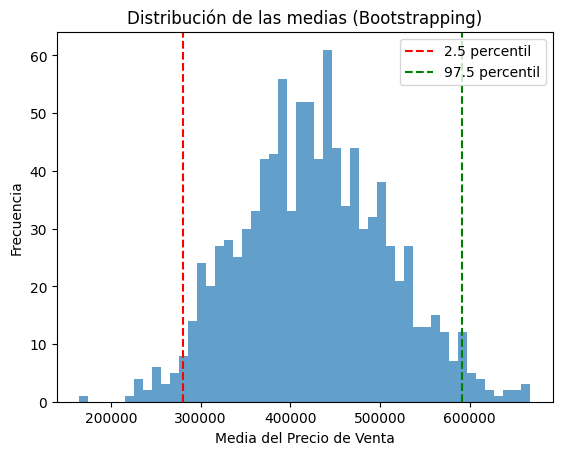

(array([279979.16666667, 590854.16666667]), None)

In [66]:
# Extraer columna de precios de venta
precios = data['Precio_Venta'].values

# Obtener intervalo de confianza y muestras de bootstrap
bootstrap_samples, intervalo_confianza = bootstrap(precios)
intervalo_confianza, plot_bootstrap(bootstrap_samples)
